In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.skybrightness as sb
from lsst.sims.utils import hpid2RaDec, angularSeparation

In [2]:
skymodel = sb.SkyModel(mags=True)

In [3]:
# Make a grid of ra, dec points
nside = 2048
hpids = np.arange(hp.nside2npix(nside))
hp_ra, hp_dec = hpid2RaDec(nside, hpids)

In [4]:
# Note, this is ugly and brute force and one should use a kdtree if scaling up
# Let's look at my favorite point, ra=, dec=-30
distances = angularSeparation(hp_ra, hp_dec, 0., -30.)
good = np.where(distances < 3.5/2.)

In [5]:
mjd = 57000
skymodel.setRaDecMjd(hp_ra[good], hp_dec[good], mjd, degrees=True)

In [6]:
mags = skymodel.returnMags()

In [7]:
g_map = np.zeros(hpids.size, dtype=float)
g_map[good] += mags['g']

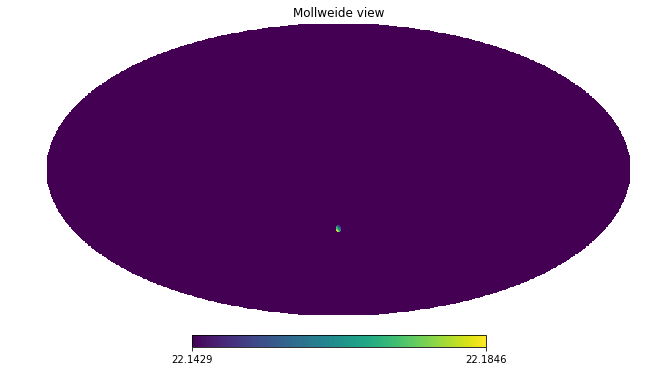

In [8]:
hp.mollview(g_map,  min=g_map[good].min())

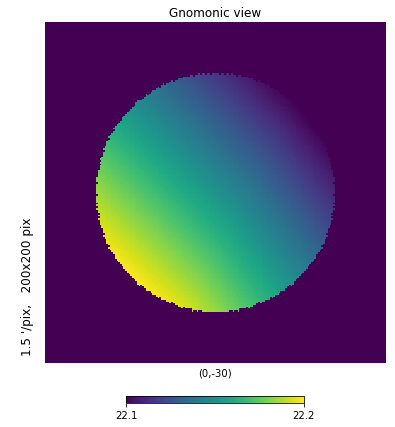

In [9]:
hp.gnomview(g_map, rot=(0,-30,0), min=g_map[good].min())

In [13]:
# Check that things are indeed down
skymodel.moonAlt, skymodel.sunAlt

(-0.3112129271030426, -0.0871056616306305)